In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Users\suhye\Desktop\빅분기 실기\BigData_data_최종본(1022)\Market_Basket.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data[j][i])
                        for j in range(data.shape[1] - data.isnull().sum(axis=1)[i])])
    
    
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [3]:
!pip install apyori
from apyori import apriori

rules = apriori(transactions, min_support=0.015, min_confidence=0.2, min_lift=1, min_length=1)

In [4]:
results = list(rules)
results

[RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]),
 RelationRecord(items=frozenset({'eggs', 'burgers'}), support=0.02879616051193174, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.33027522935779813, lift=1.8378297443715457)]),
 RelationRecord(items=frozenset({'french fries', 'burgers'}), support=0.021997067057725635, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'french fries'}), confidence=0.25229357798165136, lift=1.4761732671141707)]),
 RelationRecord(items=frozenset({'green tea', 'burgers'}), support=0.0174643380882549, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'green tea'}), confidence=0.2003058103975535, lift=1.5161391360161947)]),
 RelationR

In [5]:
print(len(results))

78


In [6]:
df = pd.DataFrame(results)
df

,items,support,ordered_statistics
0,(mineral water),0.238368,"[((), (mineral water), 0.23836821757099053, 1.0)]"
1,"(eggs, burgers)",0.028796,"[((burgers), (eggs), 0.33027522935779813, 1.83..."
2,"(french fries, burgers)",0.021997,"[((burgers), (french fries), 0.252293577981651..."
3,"(green tea, burgers)",0.017464,"[((burgers), (green tea), 0.2003058103975535, ..."
4,"(milk, burgers)",0.017864,"[((burgers), (milk), 0.20489296636085627, 1.58..."
...,...,...,...
73,"(spaghetti, tomatoes)",0.020931,"[((tomatoes), (spaghetti), 0.3060428849902534,..."
74,"(spaghetti, turkey)",0.016531,"[((turkey), (spaghetti), 0.26439232409381663, ..."
75,"(chocolate, spaghetti, mineral water)",0.015865,"[((chocolate, mineral water), (spaghetti), 0.3..."
76,"(mineral water, spaghetti, ground beef)",0.017064,"[((mineral water, ground beef), (spaghetti), 0..."


In [7]:
ar = (df.loc[1:74]['items'])
ar

1              (eggs, burgers)
2      (french fries, burgers)
3         (green tea, burgers)
4              (milk, burgers)
5     (mineral water, burgers)
                ...           
70      (spaghetti, olive oil)
71       (spaghetti, pancakes)
72         (shrimp, spaghetti)
73       (spaghetti, tomatoes)
74         (spaghetti, turkey)
Name: items, Length: 74, dtype: object

In [15]:
!pip install decorator==4.3

  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6


ValueError: 'c' argument has 6 elements, which is inconsistent with 'x' and 'y' with size 27.

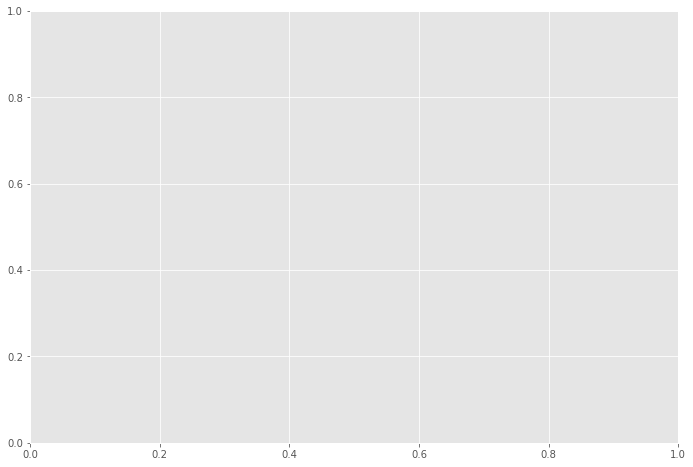

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
G = nx.Graph()
G.add_edges_from(ar)
pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels = False, edge_color='green',node_size=800en','blue','cyan','orange','magenta'])
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)
    
plt.show()